Work flow for the project:

House price dataset loading -> Data Preprocessing -> Data Analysis -> train_test_split -> XG-boost Reg -> Data Evaluation

In [ ]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics


In [ ]:
#loading the dataset to pandas dataframe
hp=pd.read_csv('/content/Housing.csv')
hp.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
hp.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [ ]:
hp.shape

(545, 13)

In [ ]:
hp.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [ ]:
hp.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [ ]:
#understanding co-relation featuresof dataset
correlation=hp.corr()
print(correlation)

              price      area  bedrooms  bathrooms   stories   parking
price      1.000000  0.535997  0.366494   0.517545  0.420712  0.384394
area       0.535997  1.000000  0.151858   0.193820  0.083996  0.352980
bedrooms   0.366494  0.151858  1.000000   0.373930  0.408564  0.139270
bathrooms  0.517545  0.193820  0.373930   1.000000  0.326165  0.177496
stories    0.420712  0.083996  0.408564   0.326165  1.000000  0.045547
parking    0.384394  0.352980  0.139270   0.177496  0.045547  1.000000


<ipython-input-8-23e130402175>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=hp.corr()


<Axes: >

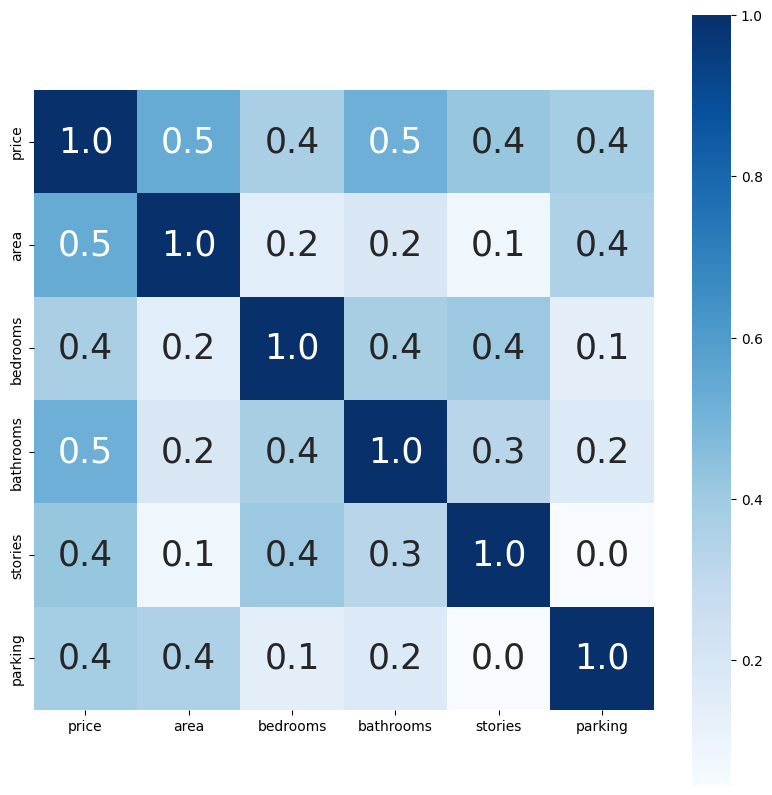

In [ ]:
#constructing heatmap for understanding the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':25},cmap='Blues')

Spliting the data in to features and target

In [ ]:
X=hp.drop(columns='price',axis=1)
Y=hp['price']

In [ ]:
print(X)

     area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    7420         4          2        3      yes        no       no   
1    8960         4          4        4      yes        no       no   
2    9960         3          2        2      yes        no      yes   
3    7500         4          2        2      yes        no      yes   
4    7420         4          1        2      yes       yes      yes   
..    ...       ...        ...      ...      ...       ...      ...   
540  3000         2          1        1      yes        no      yes   
541  2400         3          1        1       no        no       no   
542  3620         2          1        1      yes        no       no   
543  2910         3          1        1       no        no       no   
544  3850         3          1        2      yes        no       no   

    hotwaterheating airconditioning  parking prefarea furnishingstatus  
0                no             yes        2      yes        furnished  
1

In [ ]:
print(Y)

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64


In [ ]:
#XGB regressor does not support other data types rather than :int, float, bool, or category
# Example using pandas for one-hot encoding
X = pd.get_dummies(X, columns=["hotwaterheating", "airconditioning", "prefarea", "furnishingstatus"], drop_first=True)


In [ ]:
# Example using pandas for label encoding /converting them in to numerical form
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
X["mainroad"] = label_encoder.fit_transform(X["mainroad"])
X["guestroom"] = label_encoder.fit_transform(X["guestroom"])
X["basement"] = label_encoder.fit_transform(X["basement"])

Spliting the data in to test and train data

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.15,random_state=3)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(545, 13) (463, 13) (82, 13)


In [ ]:
X_train.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,parking,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
367,3630,2,1,1,1,0,0,0,0,1,0,0,1
180,4500,4,2,1,0,0,1,2,0,1,0,1,0
375,5960,3,1,2,1,1,1,0,0,0,0,0,1
130,4800,3,1,1,1,1,1,0,0,0,0,0,1
174,3800,3,1,2,1,1,1,1,0,0,1,0,1


Model Training

XGBoost Regressor

In [ ]:
#loading the model
model=XGBRegressor()

In [ ]:
#Training model with X axis
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
#Model Evaluation

In [ ]:
X_train_predict=model.predict(X_train)
print(X_train_predict)



[ 3432392.   5127237.5  3768028.5  5613305.   5139358.   6131115.
  2947941.2  3316658.8  3661383.5  3771514.2  5986451.5  3760718.2
  5489524.   2944360.5  3314464.   5441142.5  3036411.   4335991.5
  2891708.   4263121.5  3751419.2  4131693.8  2953899.   4445398.5
  3818571.5  4334396.5  2690342.8  3381430.   4505135.   3220217.2
  4182636.   3464100.5  4330443.5  5609836.5  4070021.8  4866187.
  4682685.5  7671933.   4629157.   3337736.   5835448.5  2264900.5
  4857497.5  4658852.   5038491.   3656010.8  8736659.   4536991.
  4754881.5  6297944.   3424211.   3198899.5  4582974.5  7421631.
  2079514.6  3739926.2  3169290.5  8399156.   6927685.5  4251327.
  3446169.2  3221654.2  5237711.   2116099.2  9005292.   2284780.8
  3815715.2  4024234.8  5119740.   3151924.5  4486516.   3698321.2
  2443125.2  4719012.5  2673476.5  5220082.5  3981094.5  3664804.8
  5203408.   3160054.   5747142.5  3666407.   4699934.5  7370167.5
  3065120.2  6571519.5  5950536.5  3638278.2  3932946.5  5312097.
 

In [ ]:
score_1=metrics.r2_score(Y_train,X_train_predict)
score_2=metrics.mean_absolute_error(Y_train,X_train_predict)

R Squared Error

In [ ]:
print("R Squared Error : ",score_1)
print("Mean Absolute Error : ",score_2)

R Squared Error :  0.9960118749376985
Mean Absolute Error :  71787.23812095032


In [ ]:
#Calculating error values for X_test
X_test_predict=model.predict(X_test)
print(X_test_predict)

[3525142.2 5107965.5 5874437.5 5857768.5 3328908.8 3896975.  5676463.
 6071722.5 3527010.5 4750136.5 3301156.2 7599894.5 7693111.5 8079454.5
 3432305.8 3806055.  2935782.  6859871.  5105516.5 6886356.5 4911591.5
 3286439.5 4257066.  3475105.8 7254969.  5367603.  6127105.  6593600.
 1944424.8 3472618.2 9780536.  3879958.2 3405807.8 4520353.5 5770461.5
 4219813.  5091886.5 3822194.2 4714228.5 9258590.  6029785.  5720527.5
 5264087.  2726714.2 4036162.2 4766103.5 6002741.  5070795.5 4418259.5
 6368268.5 5440155.  4222557.  8236585.  3410567.5 4598248.  2561561.2
 5691643.  4775095.  3187898.8 6843489.  3873049.8 4903965.  4762792.
 3510424.8 7066856.  5263735.  6055332.5 4984469.5 2953899.  4629754.5
 2217031.5 5069118.  4412685.5 4368335.5 4374731.5 4557438.  2632768.
 7091978.5 3903472.8 4079401.  3751141.5 6306509. ]


In [ ]:
score_1=metrics.r2_score(Y_test,X_test_predict)
score_2=metrics.mean_absolute_error(Y_test,X_test_predict)

In [ ]:
print("R Squared Error : ",score_1)
print("Mean Absolute Error : ",score_2)

R Squared Error :  0.5930647301283203
Mean Absolute Error :  807027.5213414634


Visualizing the actual prices and predicted one

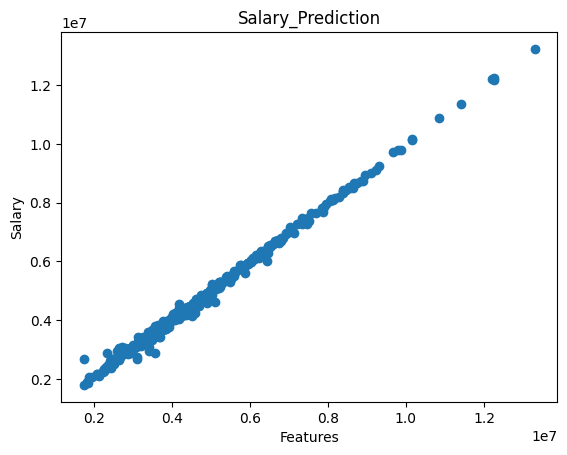

In [ ]:
# comparision on train data
plt.scatter(Y_train,X_train_predict)
plt.xlabel('Actual_Price')
plt.ylabel('Predicted_Price')
plt.title('Salary_Prediction')
plt.show()

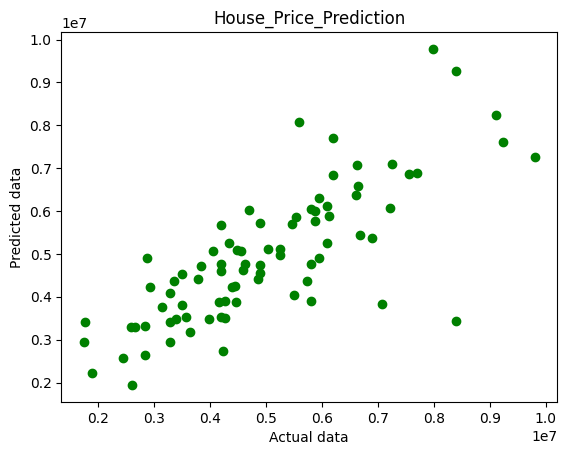

In [ ]:
# comparision on test data
plt.scatter(Y_test,X_test_predict,color='g')
plt.xlabel('Actual data')
plt.ylabel('Predicted data')
plt.title('House_Price_Prediction')
plt.show()

In [ ]:
#Making a predictve system
input_data=(4500,4,2,1,0,0,1,2,0,1,0,1,0)

In [ ]:
#converting the input data in to npdim array
input_data_as_array=np.asarray(input_data)


In [ ]:
#reshape the data from 1d to 2d
data_reshaped=input_data_as_array.reshape(1,-1)

In [ ]:
#predicting the data from  actual data
prediction=model.predict(data_reshaped)
print("The predicted house price is: ",prediction)
#prediction is almost close for this parameters : 520000

The predicted house price is:  [5127237.5]
